In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [17]:
#read csv file
df=pd.read_csv("features.csv",index_col=[0])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(df.loc[:,df.columns!="label"],df["label"],test_size=0.2,random_state=8)

In [81]:
#map features to same scale
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)

In [88]:
#cross validating on various classifiers
models=[LogisticRegression(),LinearSVC(),KNeighborsClassifier(n_neighbors=3),RandomForestClassifier(n_estimators=200)]
temp=[]
k=6
cols=["fold","classifier","accuracy"]
for model in models:
    classifier=model
    classifier_name=model.__class__.__name__
    accuracies=cross_val_score(classifier,x_train,y_train,scoring="accuracy",cv=k)
    for fold in range(k):
        row=temp.append([fold,classifier_name,accuracies[fold]])
new_df=pd.DataFrame(temp,columns=cols)        

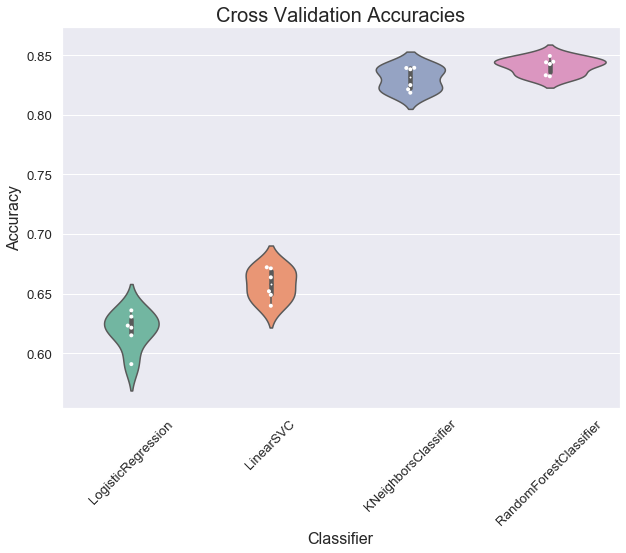

In [100]:
#visualize cross validation accuracies
plt.figure(figsize=(10,7))
sn.set(font_scale=1.2)
sn.set_style("darkgrid")
sn.violinplot(x="classifier",y="accuracy",data=new_df,palette="Set2")
sn.swarmplot(x="classifier",y="accuracy",data=new_df,color="white",size=4,edgecolor="gray")
plt.title('Cross Validation Accuracies',fontsize=20)
plt.xlabel("Classifier",fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Accuracy",fontsize=16)
plt.show()

In [111]:
#prediction on best model
scaler=MinMaxScaler()
x_test=scaler.fit_transform(x_test)

model=KNeighborsClassifier(n_neighbors=3)
model_n=model.__class__.__name__
model.fit(x_train,y_train)
pred=model.predict(x_test)

#evaluation
accuracy=accuracy_score(y_test,pred)
print("The Accuracy of %s model is %.4f." % (model_n,accuracy))

The Accuracy of KNeighborsClassifier model is 0.8574.


In [121]:
#classification report
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

       blues       0.83      0.90      0.87       125
   classical       0.87      0.94      0.90       127
     country       0.82      0.78      0.80       113
       disco       0.73      0.82      0.77       108
      hiphop       0.87      0.93      0.90       117
        jazz       0.92      0.84      0.88       128
       metal       0.87      0.93      0.90       114
         pop       0.88      0.89      0.88       106
      reggae       0.87      0.75      0.81       116
        rock       0.93      0.79      0.85       138

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192

